In [107]:
import pandas as pd
import pyreadstat
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_spss("../data/secom_mod.sav")

In [4]:
df.set_index('ID',inplace=True)

In [5]:
df = df.drop(columns='timestamp')

In [22]:
df.head()

,class,feature001,feature002,feature003,feature004,feature005,feature006,feature007,feature008,feature009,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
ID,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
2.0,0.0,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
3.0,1.0,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
4.0,0.0,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
5.0,0.0,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [10]:
df.shape

(1567, 592)

In [6]:
df.isnull().any()

ID            False
class         False
timestamp     False
feature001     True
feature002     True
              ...  
feature586     True
feature587     True
feature588     True
feature589     True
feature590     True
Length: 593, dtype: bool

In [71]:
df.isnull().sum()/len(df) * 100

class         0.000000
feature001    0.382897
feature002    0.446713
feature003    0.893427
feature004    0.893427
                ...   
feature586    0.063816
feature587    0.063816
feature588    0.063816
feature589    0.063816
feature590    0.063816
Length: 591, dtype: float64

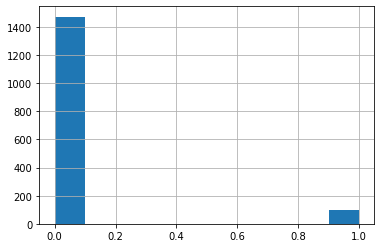

In [21]:
df['class'].hist()

In [23]:
df['class'].value_counts()

0.0    1472
1.0      95
Name: class, dtype: int64

In [41]:
df['class'].value_counts(normalize=True) * 100

0.0    93.93746
1.0     6.06254
Name: class, dtype: float64

### Spliting the data into test and train

In [30]:
y = df['class']

In [31]:
print(y)

ID
1.0       0.0
2.0       0.0
3.0       1.0
4.0       0.0
5.0       0.0
         ... 
1563.0    0.0
1564.0    0.0
1565.0    0.0
1566.0    0.0
1567.0    0.0
Name: class, Length: 1567, dtype: float64


In [28]:
x = df.drop('class', axis=1)

In [32]:
x_train, x_test, y_train, y_test = train_test_split (x,y, test_size=0.2, random_state=40, shuffle=True, stratify=y)

In [42]:
y_train.value_counts(normalize=True) * 100

0.0    93.934557
1.0     6.065443
Name: class, dtype: float64

In [43]:
y_test.value_counts(normalize=True) * 100

0.0    93.949045
1.0     6.050955
Name: class, dtype: float64

In [35]:
print(y_train)

ID
1379.0    0.0
822.0     0.0
1338.0    0.0
1313.0    0.0
1533.0    0.0
         ... 
92.0      0.0
1165.0    0.0
714.0     0.0
474.0     0.0
635.0     1.0
Name: class, Length: 1253, dtype: float64


In [9]:
df.isnull().sum(axis = 0)

ID            0
class         0
timestamp     0
feature001    6
feature002    7
             ..
feature586    1
feature587    1
feature588    1
feature589    1
feature590    1
Length: 593, dtype: int64

In [10]:
df.isnull().sum(axis = 1)

0        44
1        36
2        20
3        20
4        40
       ... 
1562     52
1563     52
1564    148
1565     60
1566    152
Length: 1567, dtype: int64

In [14]:
df.isnull().values.sum()

41951

In [21]:
len(np.unique(df['feature006']))==1

False

In [19]:
len(np.unique(df['class']))==1

False

In [47]:
### 116 of the cols have only one values in them excluding Nan values, however 0 column have only one value if we count NaN as
### a seperate value.
len(x_train.columns[x_train.nunique() == 1])

116

In [48]:
x_train.columns[x_train.nunique() == 1]

Index(['feature006', 'feature014', 'feature043', 'feature050', 'feature053',
       'feature070', 'feature098', 'feature142', 'feature150', 'feature179',
       ...
       'feature530', 'feature531', 'feature532', 'feature533', 'feature534',
       'feature535', 'feature536', 'feature537', 'feature538', 'feature539'],
      dtype='object', length=116)

In [49]:
print(list(x_train.columns[x_train.nunique() == 1]))

['feature006', 'feature014', 'feature043', 'feature050', 'feature053', 'feature070', 'feature098', 'feature142', 'feature150', 'feature179', 'feature180', 'feature187', 'feature190', 'feature191', 'feature192', 'feature193', 'feature194', 'feature195', 'feature227', 'feature230', 'feature231', 'feature232', 'feature233', 'feature234', 'feature235', 'feature236', 'feature237', 'feature238', 'feature241', 'feature242', 'feature243', 'feature244', 'feature257', 'feature258', 'feature259', 'feature260', 'feature261', 'feature262', 'feature263', 'feature264', 'feature265', 'feature266', 'feature267', 'feature277', 'feature285', 'feature314', 'feature315', 'feature316', 'feature323', 'feature326', 'feature327', 'feature328', 'feature329', 'feature330', 'feature331', 'feature365', 'feature370', 'feature371', 'feature372', 'feature373', 'feature374', 'feature375', 'feature376', 'feature379', 'feature380', 'feature381', 'feature382', 'feature395', 'feature396', 'feature397', 'feature398', 'feat

In [50]:
len(x_train.columns[x_train.nunique(dropna=False) == 1])

0

In [51]:
### these cols have only one value and some NaNs!
x_train[x_train.columns[x_train.nunique() == 1]]

,feature006,feature014,feature043,feature050,feature053,feature070,feature098,feature142,feature150,feature179,...,feature530,feature531,feature532,feature533,feature534,feature535,feature536,feature537,feature538,feature539
ID,,,,,,,,,,,,,,,,,,,,,
1379.0,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
822.0,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1338.0,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1313.0,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1533.0,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92.0,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1165.0,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
714.0,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
x_train.drop(list(x_train.columns[x_train.nunique() == 1]), axis=1 ,inplace=True)

C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [56]:
# can move this top
y_train = y_train.replace({0.0:'pass',1.0:'fail'})

## removing some more feaures by their percentage of their missing value to their total number of values (%55 threshold according to papers)

In [94]:
percentages = x_train.isnull().sum()/len(x_train) * 100

In [95]:
x_train.columns.shape

(474,)

In [96]:
name_columns = x_train.columns
col = []
for i in range (x_train.columns.shape[0]):
     if percentages[i]<=55: 
        col.append(name_columns[i])

In [97]:
len(col)

450

In [98]:
x_train = x_train[col]

In [57]:
y_train.head()

ID
1379.0    pass
822.0     pass
1338.0    pass
1313.0    pass
1533.0    pass
Name: class, dtype: object

In [66]:
x_train.shape

(1253, 590)

#### this method is wrong 
my_threshold = VarianceThreshold(threshold=0.1)
x_train_variance_removed = my_threshold.fit_transform(x_train)
x_train_variance_removed.shape

In [109]:
## the other normalizing methods does not work here for now, because we have Nan values in our data.
scaler = MinMaxScaler()
scaler.fit(x_train)
scaled_x_train = scaler.transform(x_train)

In [110]:
x_train_normalized = pd.DataFrame(scaled_x_train)
x_train_normalized.var()

0      0.014988
1      0.013719
2      0.013268
3      0.021591
4      0.001603
         ...   
445    0.001637
446    0.010815
447    0.013164
448    0.010874
449    0.015380
Length: 450, dtype: float64

In [113]:
variance_clos = x_train_normalized.var()

In [114]:
columns = x_train.columns

In [115]:
col2 = []
for i in range(0, len(variance_clos)):
    if variance_clos[i] >= 0.01: # can change this number after modeling
        col2.append(columns[i])

In [116]:
x_train = x_train[col2]

In [119]:
x_train.var()

feature001      5634.070374
feature002      6487.815610
feature003       860.081435
feature004    194836.642087
feature007        38.406232
                  ...      
feature583         0.000012
feature587         0.000155
feature588         0.000077
feature589         0.000008
feature590      8360.951074
Length: 217, dtype: float64

In [118]:
x_train.shape

(1253, 217)